In [239]:
import pandas as pd

In [240]:
df = pd.read_csv('./assets/ge_rates_nonadj_21.csv') #importing Compbined Data

In [241]:
df.columns

Index(['Date', 'Close', 'Volume', 'std', 'upper', 'lower', 'Rates'], dtype='object')

In [242]:
#df = df.drop(['Volume', 'std', 'upper', 'lower'], axis = 1)

In [243]:
df['lag'] = df['Close'].shift() #making the lags based on PACF
#df['std'] = df['std'].shift()

In [244]:
df.dropna(inplace=True)

In [245]:
df.head()

,Date,Close,Volume,std,upper,lower,Rates,lag
1,1990-11-19,4.614583,18886800.0,0.011662,4.637906,4.591260,7.06,4.614583
2,1990-11-20,4.437500,22634400.0,0.011617,4.460733,4.414267,7.06,4.614583
3,1990-11-21,4.479167,15367200.0,0.011422,4.502011,4.456323,7.06,4.437500
4,1990-11-23,4.468750,4462800.0,0.010901,4.490552,4.446948,7.06,4.479167
5,1990-11-26,4.447917,13736400.0,0.009763,4.467443,4.428391,7.06,4.468750


In [246]:
df['std_1'] = df['Close'].rolling(5).std().dropna().shift()
df['lag_2'] = df['Close'].shift(60) #making the standard deviation and 60 day lag

In [247]:
df.dropna(inplace=True)

In [248]:
df['Date'] = pd.to_datetime(df['Date'])

In [249]:
df.set_index('Date', inplace=True)

For GE I am going to make my train test split on the year 2014

In [250]:
train_df = df[:'2014']
test_df = df['2015':] #training and testing data

In [251]:
train_df.tail()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2014-12-24,25.830000,17865100.0,0.564560,26.959120,24.700880,0.03,25.879999,0.497514,25.620001
2014-12-26,25.780001,14978500.0,0.517207,26.814415,24.745587,0.03,25.830000,0.295347,25.160000
2014-12-29,25.700001,20858200.0,0.492689,26.685378,24.714624,0.03,25.780001,0.102127,25.120001
2014-12-30,25.570000,22184500.0,0.487743,26.545487,24.594513,0.03,25.700001,0.077136,25.400000
2014-12-31,25.270000,28206500.0,0.479912,26.229824,24.310176,0.03,25.570000,0.121532,25.219999


In [252]:
test_df.tail()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2018-10-15,12.15,62640200.0,0.709739,13.569478,10.730522,2.03,12.32,0.558507,13.12
2018-10-16,12.10,86485800.0,0.709427,13.518855,10.681145,2.03,12.15,0.602520,12.99
2018-10-17,12.19,83433100.0,0.700259,13.590519,10.789481,2.03,12.10,0.492626,13.12
2018-10-18,12.38,81520200.0,0.699676,13.779352,10.980648,2.03,12.19,0.250659,13.11
2018-10-19,12.56,86762800.0,0.700680,13.961360,11.158640,2.03,12.38,0.117771,13.15


To see this visually, we can make a line plot of the train and test data

In [253]:
import matplotlib.pyplot as plt # the following graphs train test split

In [254]:
graph_df_train = train_df
maper = {'Close':'Train'}
graph_df_train.rename(maper, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [255]:
graph_df_test = test_df
maper = {'Close':'Test'}
graph_df_test.rename(maper, axis = 1, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3778: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


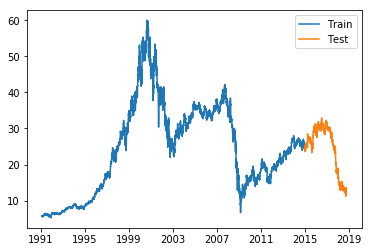

In [256]:
plt.plot(graph_df_train['Train'])
plt.plot(graph_df_test['Test'])
plt.legend();

As you can see, 2014 is a year where the pattern of a downward trend may begin again. Lets build a model to find out. 

In [257]:
df.head()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
1991-02-14,5.614583,33702000.0,0.030586,5.675755,5.553411,5.94,5.656250,0.102221,4.614583
1991-02-15,5.802083,38295600.0,0.031422,5.864927,5.739239,5.94,5.614583,0.082219,4.437500
1991-02-19,5.802083,24819600.0,0.031188,5.864459,5.739707,5.94,5.802083,0.098986,4.479167
1991-02-20,5.697917,19006800.0,0.028890,5.755697,5.640137,5.94,5.802083,0.109746,4.468750
1991-02-21,5.677083,14624400.0,0.026072,5.729227,5.624939,5.94,5.697917,0.085137,4.447917


In [258]:
train_df = df[:'2014']
test_df = df['2015':]

In [259]:
train_df.tail()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2014-12-24,25.830000,17865100.0,0.564560,26.959120,24.700880,0.03,25.879999,0.497514,25.620001
2014-12-26,25.780001,14978500.0,0.517207,26.814415,24.745587,0.03,25.830000,0.295347,25.160000
2014-12-29,25.700001,20858200.0,0.492689,26.685378,24.714624,0.03,25.780001,0.102127,25.120001
2014-12-30,25.570000,22184500.0,0.487743,26.545487,24.594513,0.03,25.700001,0.077136,25.400000
2014-12-31,25.270000,28206500.0,0.479912,26.229824,24.310176,0.03,25.570000,0.121532,25.219999


In [260]:
test_df.head()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2015-01-02,25.059999,40920800.0,0.454663,25.969326,24.150672,0.03,25.270000,0.223942,24.809999
2015-01-05,24.600000,42033200.0,0.458973,25.517946,23.682054,0.03,25.059999,0.302870,25.250000
2015-01-06,24.070000,63760000.0,0.497231,25.064461,23.075539,0.03,24.600000,0.436864,24.780001
2015-01-07,24.080000,43642500.0,0.533998,25.147996,23.012004,0.03,24.070000,0.589347,24.270000
2015-01-08,24.370001,43224400.0,0.548181,25.466362,23.273640,0.03,24.080000,0.550118,23.950001


Scale Data

In [261]:
from sklearn.preprocessing import MinMaxScaler

In [262]:
scaler = MinMaxScaler()

In [263]:
X_train = train_df[['Rates', 'lag', 'std_1', 'lag_2']].values
X_test = test_df[['Rates', 'lag', 'std_1', 'lag_2']].values

In [264]:
X_train

array([[ 5.94      ,  5.65625   ,  0.10222142,  4.614583  ],
       [ 5.94      ,  5.614583  ,  0.08221907,  4.4375    ],
       [ 5.94      ,  5.802083  ,  0.09898563,  4.479167  ],
       ...,
       [ 0.03      , 25.780001  ,  0.10212691, 25.120001  ],
       [ 0.03      , 25.700001  ,  0.07713589, 25.4       ],
       [ 0.03      , 25.57      ,  0.12153158, 25.219999  ]])

In [265]:
train_df_sc = scaler.fit_transform(X_train) #scaling the data to put through my nerual network
test_df_sc = scaler.transform(X_test)

In [266]:
print(train_df_sc.shape)
print(test_df_sc.shape)

(6017, 4)
(958, 4)


In [267]:
train_df_sc

array([[9.62662338e-01, 8.36342297e-03, 3.04438476e-02, 4.12060988e-03],
       [9.62662338e-01, 7.60310516e-03, 2.44866945e-02, 9.36498975e-04],
       [9.62662338e-01, 1.10245080e-02, 2.94801550e-02, 1.68570894e-03],
       ...,
       [3.24675325e-03, 3.75571199e-01, 3.04156992e-02, 3.72826386e-01],
       [3.24675325e-03, 3.74111400e-01, 2.29728091e-02, 3.77861019e-01],
       [3.24675325e-03, 3.71739209e-01, 3.61948481e-02, 3.74624440e-01]])

In [268]:
from sklearn.svm import SVR

In [269]:
svr = SVR()

In [270]:
y_train = train_df['Close'].values.reshape(-1,1)

In [271]:
len(X_train)

6017

In [272]:
len(y_train)

6017

In [273]:
svr.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [274]:
y_pred = svr.predict(X_test) #testing the svr function to see what happens

In [275]:
len(y_pred)

958

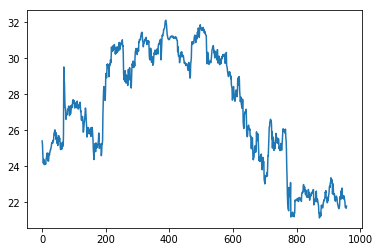

In [276]:

plt.plot(y_pred)

In [277]:
y_test = test_df['Close'].values

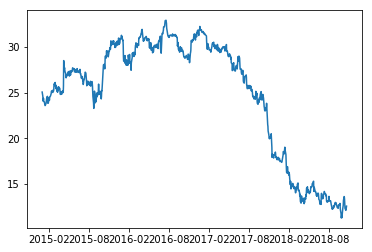

In [278]:
plt.plot(test_df['Close'])

In [279]:
from sklearn.metrics import r2_score

In [280]:
r2_score(y_pred, test_df['Close'])

-0.7023400369104786

In [281]:
from keras.models import Sequential #imports for NN
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

In [282]:
from keras import backend as K
K.reset_uids()
K.clear_session()

In [283]:
X_train.shape

(6017, 4)

In [284]:
model = Sequential() 
model.add(Dense(10, input_shape=(X_train.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(10, input_shape=(X_train.shape[1],)))
model.add(Dense(10, input_shape=(X_train.shape[1],)))
model.add(Dense(10, input_shape=(X_train.shape[1],)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, batch_size=16, validation_data=(X_test, y_test), epochs=100, verbose=1)
#EarlyStopping(monitor='mean_squared_error', min_delta=0.01, patience=.01, verbose=0, mode='auto')

Train on 6017 samples, validate on 958 samples
Epoch 1/100
6017/6017 [==============================] - 3s 502us/step - loss: 116.4073 - val_loss: 0.2519
Epoch 2/100
6017/6017 [==============================] - 1s 248us/step - loss: 0.4341 - val_loss: 0.1314
Epoch 3/100
6017/6017 [==============================] - 2s 258us/step - loss: 0.3419 - val_loss: 0.1310
Epoch 4/100
6017/6017 [==============================] - 2s 294us/step - loss: 0.3145 - val_loss: 0.1254
Epoch 5/100
6017/6017 [==============================] - 2s 251us/step - loss: 0.2973 - val_loss: 0.1831
Epoch 6/100
6017/6017 [==============================] - 2s 249us/step - loss: 0.3048 - val_loss: 0.1091
Epoch 7/100
6017/6017 [==============================] - 1s 240us/step - loss: 0.2851 - val_loss: 0.1423
Epoch 8/100
6017/6017 [==============================] - 1s 249us/step - loss: 0.2926 - val_loss: 0.1163
Epoch 9/100
6017/6017 [==============================] - 1s 243us/step - loss: 0.2958 - val_loss: 0.1111
Epoch 

Epoch 78/100
6017/6017 [==============================] - 2s 262us/step - loss: 0.2977 - val_loss: 0.1331
Epoch 79/100
6017/6017 [==============================] - 2s 262us/step - loss: 0.2985 - val_loss: 0.1103
Epoch 80/100
6017/6017 [==============================] - 2s 262us/step - loss: 0.2988 - val_loss: 0.1118
Epoch 81/100
6017/6017 [==============================] - 1s 249us/step - loss: 0.2806 - val_loss: 0.1078
Epoch 82/100
6017/6017 [==============================] - 1s 243us/step - loss: 0.2897 - val_loss: 0.1276
Epoch 83/100
6017/6017 [==============================] - 1s 241us/step - loss: 0.2921 - val_loss: 0.1305
Epoch 84/100
6017/6017 [==============================] - 1s 238us/step - loss: 0.2903 - val_loss: 0.1087
Epoch 85/100
6017/6017 [==============================] - 2s 262us/step - loss: 0.2889 - val_loss: 0.1100
Epoch 86/100
6017/6017 [==============================] - 2s 257us/step - loss: 0.2874 - val_loss: 0.1123
Epoch 87/100
6017/6017 [======================

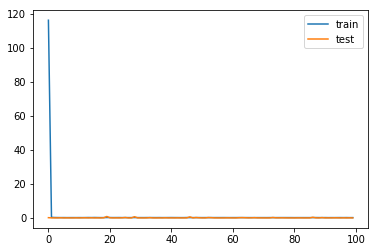

In [285]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

0.9972544773797248

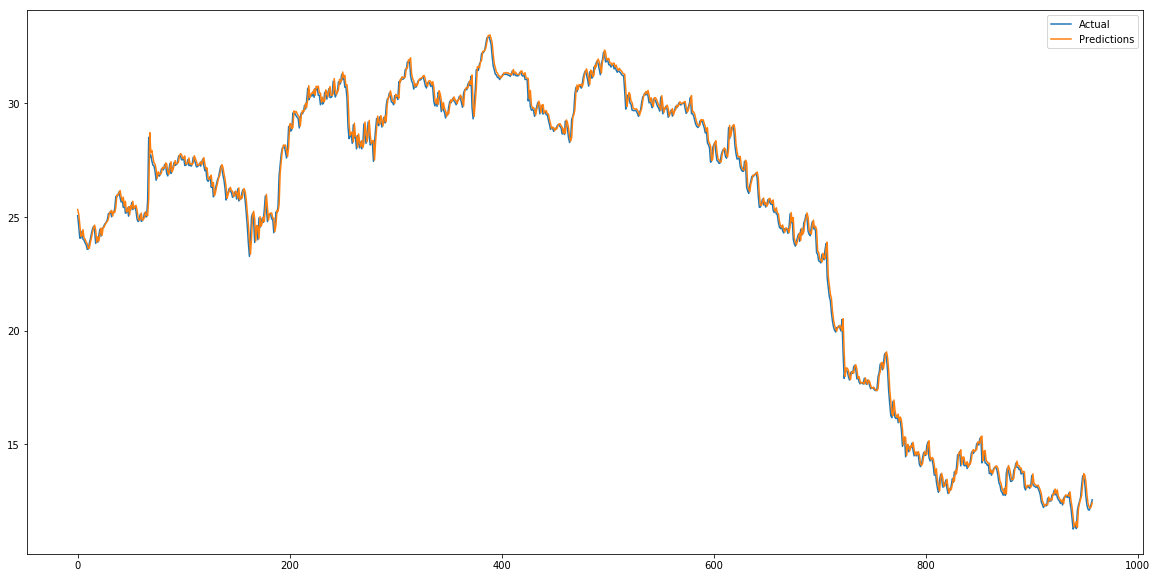

In [303]:
plt.figure(figsize=(20,10))
y_pred = model.predict(X_test)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predictions')
plt.legend()
r2_score(y_test, y_pred)

In [287]:
len(y_test)

958

In [288]:
df_pred = pd.DataFrame([y_test, y_pred]).T

In [289]:
df_pred.head()

,0,1
0,25.06,[25.329357]
1,24.6,[25.121746]
2,24.07,[24.673471]
3,24.08,[24.15659]
4,24.37,[24.165363]


In [301]:
df_pred.tail()

,Act,Preds
Date,,
2018-10-15,12.15,12.416664
2018-10-16,12.10,12.250196
2018-10-17,12.19,12.188991
2018-10-18,12.38,12.257962
2018-10-19,12.56,12.437205


In [290]:
df_pred[0] = df_pred[0].astype(float)

In [291]:
df_pred[1] = df_pred[1].astype(float)

In [292]:
maper = {0:'Act', 1:'Preds'}
df_pred.rename(maper, axis=1, inplace=True)

In [293]:
df_pred.set_index(keys=test_df.index, inplace=True)

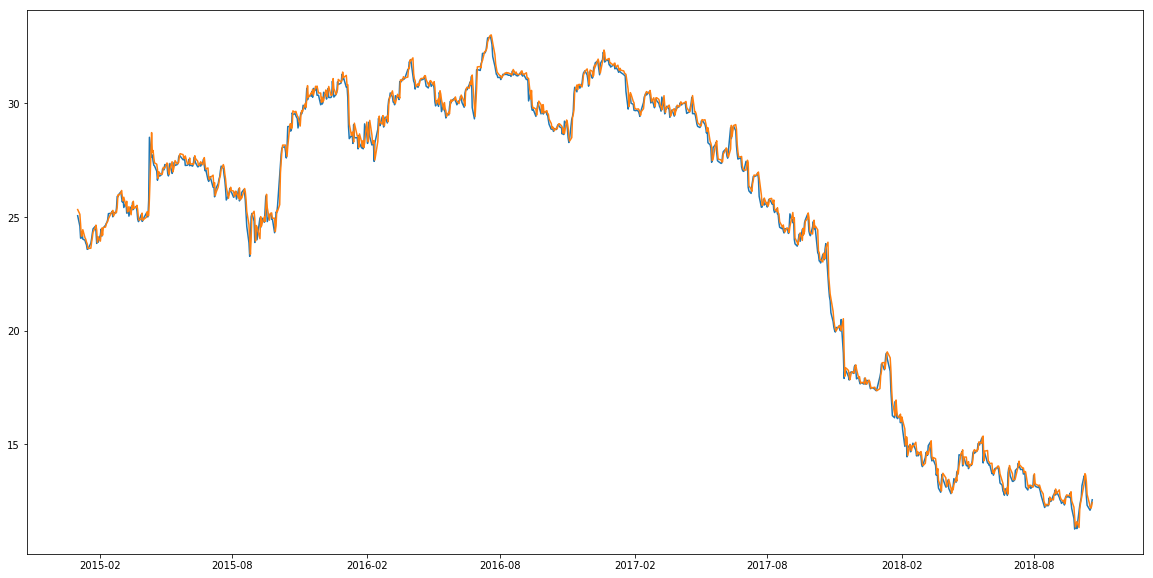

In [294]:
plt.figure(figsize=(20,10))
plt.plot(df_pred);

In [295]:
import numpy as np

In [296]:
df.tail()

,Close,Volume,std,upper,lower,Rates,lag,std_1,lag_2
Date,,,,,,,,,
2018-10-15,12.15,62640200.0,0.709739,13.569478,10.730522,2.03,12.32,0.558507,13.12
2018-10-16,12.10,86485800.0,0.709427,13.518855,10.681145,2.03,12.15,0.602520,12.99
2018-10-17,12.19,83433100.0,0.700259,13.590519,10.789481,2.03,12.10,0.492626,13.12
2018-10-18,12.38,81520200.0,0.699676,13.779352,10.980648,2.03,12.19,0.250659,13.11
2018-10-19,12.56,86762800.0,0.700680,13.961360,11.158640,2.03,12.38,0.117771,13.15


In [297]:
rate = 2
lag = 11
std = 12.482

In [298]:
pred_1 = np.array([[rate, lag, std]])

In [299]:
pred_1.shape

(1, 3)

In [300]:
#model.predict(pred_1)